Download an AlexNet and a ResNet101 model that have been trained on ImageNet. You can find these models in TorchVision. Using a camera, take a picture of an object that belongs to one of the ImageNet classes. Use both models to classify the image. Output the top 5 predicted classes and their corresponding probabilities, according to each model. Were the models correct?

In [1]:
from torchvision import models
import torch

from PIL import Image
from skimage import io, transform
import matplotlib.pyplot as plt
from torchvision import transforms

In [2]:
# Load both models

alexnet = models.alexnet(pretrained = True)
resnet = models.resnet101(pretrained=True)

### Read the image

In [25]:
# Read the image
img = Image.open("Images/orange.jpg")

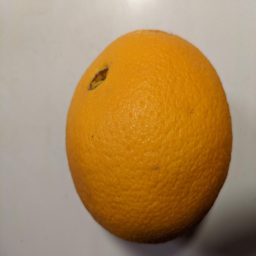

In [18]:
# Resizing the image for Alexnet
img.resize((256, 256))

In [19]:

transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(
    mean=[0.485, 0.456, 0.406],             
    std=[0.229, 0.224, 0.225]                  
)])

In [20]:
# Transform the image and prepare a batch to pass through the network
img_t = transform(img)
batch_t = torch.unsqueeze(img_t, 0)

### Prediction for Alexnet

In [21]:
# Put the model in eval mode
alexnet.eval()

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [22]:
# Carrying out the inference
out = alexnet(batch_t)
print(out.shape)

torch.Size([1, 1000])


In [23]:
# Look at the number of classes and available classes
with open('imagenet.txt') as f:
  classes = [line.strip() for line in f.readlines()]
print("Number of classes: {}".format(len(classes)))

Number of classes: 1000


In [24]:
# Find the indices of the class of the image to classify the image
_, indices = torch.sort(out, descending = True)
percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100
[(classes[idx], percentage[idx].item()) for idx in indices[0][:5]]

[('950, orange', 71.58370208740234),
 ('951, lemon', 27.69019317626953),
 ('940, spaghetti_squash', 0.4162629544734955),
 ('722, ping-pong_ball', 0.10435713082551956),
 ('522, croquet_ball', 0.08034157007932663)]

#### Alexnet model classified the image of our choice correctly with a probability of 71.58%

### Prediction for Resnet

In [11]:
resnet.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [12]:
# Carry out model inference
out = resnet(batch_t)

In [17]:
# Print the top 5 classes predicted by the model
_, indices = torch.sort(out, descending=True)
percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100
[(classes[idx], percentage[idx].item()) for idx in indices[0][:5]]

[('950, orange', 98.01934051513672),
 ('951, lemon', 1.8026951551437378),
 ('954, banana', 0.062404513359069824),
 ('722, ping-pong_ball', 0.008379497565329075),
 ('852, tennis_ball', 0.008132770657539368)]

#### Resnet model classified the image of our choice correctly with a probability of 98.01%